<a href="https://colab.research.google.com/github/TrushaT/Data-Science-/blob/main/Assignment/DS_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Group M:  
##Akshat Bhat(2018130003)  
##Trusha Talati(2018130054)  

#Tutorial on OCR using pytesseract library with an example application (Domain - Computer Vision)


## Introduction
The detection of text from images remains an important part of the applications of Computer Vision which includes image segmentation, object detection etc. Over the past few years, Optical Character Recognition (OCR) has been a major application of Computer Vision. OCR identifies text from a written or printed text document and converts it into machine-encoded text. OCR can be used to recognise text from a scanned document, a photo of a document, a scene photo or from subtitle text superimposed on an image.

The aim of this tutorial is to provide a step-by-step guide on how to apply OCR to images using pytesseract and OpenCV, along with an example application to further illustrate the application of OCR.


## Tutorial content

In this tutorial, we go through the various steps involved in the process of using OCR by making use of the pytesseract python library (https://pypi.org/project/pytesseract/) along with OpenCV, an image processing python library (https://opencv.org/).

We will be using a Randomly Generated Textual Images Dataset to demonstrate text recognition using pytesseract. We will also be using data collected from the Stanford Mobile Visual Search Dataset: Business Cards to illustrate the use of OCR to scan business card images and get valuable information from them.

We will cover the following topics in this tutorial:

- Installing the libraries
- Performing basic operations using OpenCV
- Basic usage of pytesseract for Text Localization, Detection and Recognition
- Recognising texts from Randomly Generated Textual Images using pytesseract
- Example application: Applying OCR to Business Card Images

### Installing the libraries

Before getting started, you'll need to install the various libraries that we will use. After installing tesseract-ocr, you can install OpenCV and pytesseract using pip.

Ignore any warning that you may encounter during installation of libraries or packages throughout this tutorial.

If you get an error while installing any of the libraries or packages, it might be due to a versioning issue. In that case or otherwise, Google and StackOverflow are valuable resources that will help solve the error.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Using cached Pillow-9.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


When using Google Colaboratory, some version conflicts occur between python packages. For some functionality to work, we will require to downgrade packages. The commands below will uninstall the existing Pillow package and install the downgraded version for Pillow - used for image handling.

In [ ]:
# uninstall the old one
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0

Found existing installation: Pillow 9.1.0
Uninstalling Pillow-9.1.0:
  Successfully uninstalled Pillow-9.1.0
  Using cached Pillow-5.3.0-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytesseract 0.3.9 requires Pillow>=8.0.0, but you have pillow 5.3.0 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


We need to import the installed OpenCV (cv2), pytesseract, Pillow (PIL) and matplotlib packages.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
try:
 from PIL import Image
except ImportError:
 import Image

We need to also mount our Google Drive as we are using Google Colaboratory for this tutorial.

In [ ]:
from google.colab import drive # mounting google drive which contains the dataset 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DS Assignment

/content/drive/.shortcut-targets-by-id/1I_l_bIEsLC20zJ6eQbUT42XgcH6f9ToH/DS Assignment


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/.shortcut-targets-by-id/1I_l_bIEsLC20zJ6eQbUT42XgcH6f9ToH/DS Assignment'

### Performing basic operations using OpenCV

OpenCV is a programming library geared mostly at real-time computer vision. It was created by Intel and then sponsored by Willow Garage and Itseez. OpenCV is an useful tool for image processing and computer vision. It is an open-source library which can be used for face detection, objection tracking, landmark detection etc. Let us have a look at some basic operations:

#### 1. Reading and Displaying an image

To read an image **cv2.imread()** method is used. This method loads an image from the specified file.

To display an image **plt.imshow()** method is used. This method displays an image as the output.

We will be reading an image in which a word is written by hand. After displaying the image, we will perform basic operations on it.

In [ ]:
orig = cv2.imread('/content/drive/MyDrive/DS Assignment/ocr_handwritten/images/VALIDATION_0040.jpg') # reads image and converts to array
print(orig)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


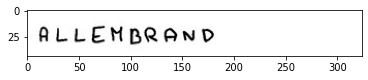

In [ ]:
plt.imshow(orig) # displays image
plt.show()

#### 2. Grayscaling of Image
Grayscaling is the process of converting an image from other color spaces e.g. RGB, CMYK, HSV, etc. to shades of gray. It varies between complete black and complete white.

**cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)** method is used which takes the image file as the first argument and the second argument signals the conversion from BGR colour scale to gray scale.

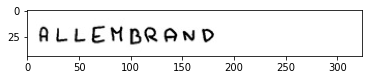

In [ ]:
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)
plt.show()

#### 3. Performing Median Blur
**cv2.medianBlur()** computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise.

One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in
 the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

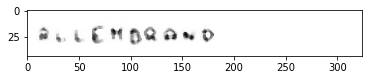

In [ ]:
median = cv2.medianBlur(orig,5)

plt.imshow(median)
plt.show()

#### 4. Performing Adaptive Thresholding

The method **cv.adaptiveThreshold()** takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.

cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the
the neighbourhood pixels.

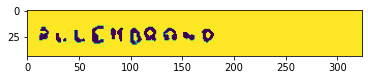

In [ ]:
img = orig
img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th2)
plt.show()

### Basic usage of pytesseract for Text Localization, Detection and Recognition



Tesseract is an open-source, free software available under the Apache License. It is currently sponsored by Google and is compatible with several programming languages with the help of wrappers. Pytesseract is one such wrapper that is used for the Python programming language.

The method **pytesseract.image_to_string()** is used to extract text from an image.

In [ ]:
text = pytesseract.image_to_string(orig)

In [ ]:
print(text)

ALLENBRAND



### Recognising texts from Randomly Generated Textual Images using pytesseract

In order to demonstrate the working of pytesseract and how accurate are its OCR predictions we will be creating a dataset containing 1000 randomly generated images that have texts in different fonts and styles. The pytesseract package is used to interface with the Tesseract OCR engine.

Firstly, we will install two python packages - **trdg** and **RandomWords**.

The **trdg** package stands for TextRecognitionDataGenerator which is a synthetic data generator for text recognition.

The RandomWords package is a helpful package for generating random words in English.

In [ ]:
!pip install trdg

     |████████████████████████████████| 91.2 MB 1.2 MB/s 
     |████████████████████████████████| 17.3 MB 502 kB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
  Using cached Pillow-9.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Created wheel for diffimg: filename=diffimg-0.2.3-py3-none-any.whl size=4049 sha256=d2b9e20e8f82f332a4213d5b3f265e65e7408b3622b652975308e0eb4a7f9a7b
  Stored in directory: /root/.cache/pip/wheels/6c/5d/60/bde2a959be56bca572bd67d49ebd52844d2ef933e85601dfa9
Successfully built diffimg
  Attempting uninstall: pillow
    Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Su

In [ ]:
!pip install RandomWords

     |████████████████████████████████| 46 kB 2.8 MB/s 
  Created wheel for RandomWords: filename=RandomWords-0.3.0-py3-none-any.whl size=45896 sha256=eb1191821ae19115eab0a60e7913b9a54a6cf0c6b32d2a040c8cc12f936ce983
  Stored in directory: /root/.cache/pip/wheels/bd/9d/3d/23d279ea00732b8b47c1fa81622258501eeb2a92751fa4a5d5
Successfully built RandomWords


Next up, we will create a RandomWords class object and generate 1000 random words by calling the **random_words()** method and providing a count argument with value 1000.

**GeneratorFromStrings()** will generate 1000 images containing text in any random font and style. The size argument specifies the size in pixels for the images generated.

A dataframe called `text_df` needs to be created which will store the filenames of the generated images and their corresponding text labels.

We will then loop through the images and labels generated and save the images in a Google Drive folder, and also save the details in the text_df dataframe.

In [ ]:
from trdg.generators import GeneratorFromStrings
from random_words import RandomWords
import pandas as pd

rw = RandomWords()
words = rw.random_words(count=1000) # generating 1000 random words
text_df = pd.DataFrame(columns=['image_filename','text_label']) # to store the filename of the image and its corresponding text label

# generating 1000 images for the randomly generated strings
generator = GeneratorFromStrings(
    words,
    count = len(words),
    size = 96
)

# loop through the images and labels generated and save the images in a Google Drive folder
for i, (img, lbl) in enumerate(generator):
  filename = f'/content/drive/MyDrive/DS Assignment/text_recognition_images/{str(i)}_{str(lbl)}.png' 
  text_df.loc[i] = [filename,str(lbl)]
  img.save(filename)

print('Generated 1000 images containing text')

Generated 1000 images containing text


Let us see an example image with its label.

holder


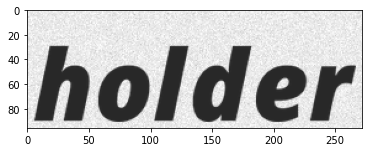

In [ ]:
plt.imshow(cv2.imread(str(text_df.iloc[0]['image_filename'])))
print(text_df.iloc[0]['text_label'])

In [ ]:
text_df # view the dataframe

,image_filename,text_label
0,/content/drive/MyDrive/DS Assignment/text_reco...,holder
1,/content/drive/MyDrive/DS Assignment/text_reco...,boil
2,/content/drive/MyDrive/DS Assignment/text_reco...,buffer
3,/content/drive/MyDrive/DS Assignment/text_reco...,sailor
4,/content/drive/MyDrive/DS Assignment/text_reco...,furs
...,...,...
995,/content/drive/MyDrive/DS Assignment/text_reco...,junk
996,/content/drive/MyDrive/DS Assignment/text_reco...,amusement
997,/content/drive/MyDrive/DS Assignment/text_reco...,distances
998,/content/drive/MyDrive/DS Assignment/text_reco...,interchanges


We can see in the dataframe above that we have successfully stored the image and corresponding text label details.

In the following steps, we will loop through these images and use the **pytesseract.image_to_string()** function to extract text from an image. The predicted labels will be stored in a list.

The **tqdm** package acts as a progress indicator for the loop as there are many images to go through.

In [ ]:
from tqdm import tqdm # to see the progress of the loop
predicted_labels = []
for filename in tqdm(text_df['image_filename']):
  img = cv2.imread(filename)
  text = pytesseract.image_to_string(img)
  predicted_labels.append(text)

100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s]


We store the predicted labels as a different column in the `text_df` dataframe.

In [ ]:
text_df['predicted_label'] = list(map(lambda x: x.strip().lower(), predicted_labels)) # convert predicted labels to lowercase

In [ ]:
text_df[['image_filename','text_label','predicted_label']]

,image_filename,text_label,predicted_label
0,/content/drive/MyDrive/DS Assignment/text_reco...,holder,holder
1,/content/drive/MyDrive/DS Assignment/text_reco...,boil,boll
2,/content/drive/MyDrive/DS Assignment/text_reco...,buffer,buffer
3,/content/drive/MyDrive/DS Assignment/text_reco...,sailor,sailor
4,/content/drive/MyDrive/DS Assignment/text_reco...,furs,furs
...,...,...,...
995,/content/drive/MyDrive/DS Assignment/text_reco...,junk,junk
996,/content/drive/MyDrive/DS Assignment/text_reco...,amusement,amusement
997,/content/drive/MyDrive/DS Assignment/text_reco...,distances,distances
998,/content/drive/MyDrive/DS Assignment/text_reco...,interchanges,interchanges


If we were to simply check with maximum strictness whether the predicted label was the same as the actual label, we would be marking a near-miss (maybe because there's a mismatch in 1 character) as a failure.

In [ ]:
text_df[text_df['text_label'] == text_df['predicted_label']]['image_filename'].count()

875

We can see that only **87.5%** of 1000 images have been exactly captured.

Since we do **not** want to mark a near-miss as a failure we will be using the **Jaro-Winkler algorithm** to detect similarity between the captured text and the actual text. Using this we will get a quantitative understanding of how accurate and practical the tessearct OCR system is.

Further information on the Jaro Similarity algorithm and the Jaro-Winkler Similarity algorithm is given below:

![Jaro-Winkler Algorithm](https://drive.google.com/uc?id=1xi4C54a7onbPbHvaM84h2-HYm6JDb_3-)

**Let us see an example of this algorithm:**

<img src="https://drive.google.com/uc?id=107E9H9coapbAWHeCvlo4caapWfZ1mxmX" alt="drawing" height="400"/>

Let's get back to our process. Now, once the similarity score is obtained, another column will be added to the `text_df` dataframe so that we can analyze the differences between the predicted labels and the actual labels via the similarity score.

In [ ]:
!pip install Levenshtein # installs Levenshtein library which contains the jaro_winkler similarity function
from Levenshtein import jaro_winkler
import numpy as np
vectorized_jaro_winkler = np.vectorize(jaro_winkler)
text_df['similarity_score'] = vectorized_jaro_winkler(
    text_df['text_label'],
    text_df['predicted_label']
)
text_df

,image_filename,text_label,predicted_label,similarity_score
0,/content/drive/MyDrive/DS Assignment/text_reco...,holder,holder,1.000000
1,/content/drive/MyDrive/DS Assignment/text_reco...,boil,boll,0.866667
2,/content/drive/MyDrive/DS Assignment/text_reco...,buffer,buffer,1.000000
3,/content/drive/MyDrive/DS Assignment/text_reco...,sailor,sailor,1.000000
4,/content/drive/MyDrive/DS Assignment/text_reco...,furs,furs,1.000000
...,...,...,...,...
995,/content/drive/MyDrive/DS Assignment/text_reco...,junk,junk,1.000000
996,/content/drive/MyDrive/DS Assignment/text_reco...,amusement,amusement,1.000000
997,/content/drive/MyDrive/DS Assignment/text_reco...,distances,distances,1.000000
998,/content/drive/MyDrive/DS Assignment/text_reco...,interchanges,interchanges,1.000000


In order to get an overall picture of the similarity score, we calculate the **mean similarity score** which in our case comes to around **95.56%**.

In [ ]:
mean_similarity_score = text_df['similarity_score'].mean()
print(f'Mean Similarity Score = {round(mean_similarity_score*100,2)}%')

Mean Similarity Score = 95.56%


The similarity scores are plotted as an histogram to see the distribution of scores for different images and their corresponding labels.

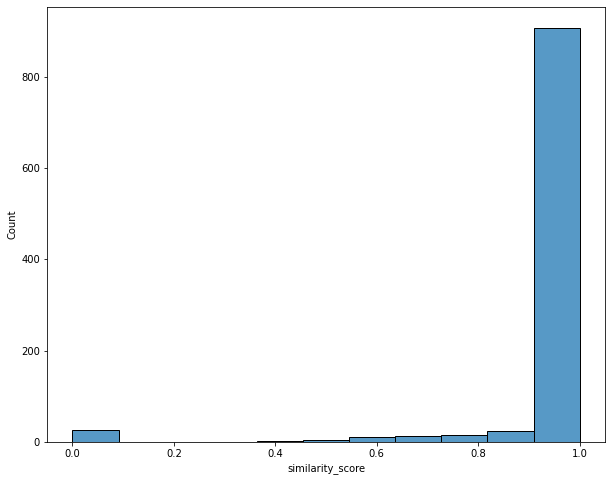

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=text_df,x='similarity_score')

We can see that most scores are 100%. However, 25 scores are 0%. Let us check out some of the images for which 0% similarity scores were obtained. 

In [ ]:
text_df[text_df['similarity_score'] == 0] # display those whose scores are 0

,image_filename,text_label,predicted_label,similarity_score
7,/content/drive/MyDrive/DS Assignment/text_reco...,cuffs,othe,0.0
60,/content/drive/MyDrive/DS Assignment/text_reco...,offset,,0.0
126,/content/drive/MyDrive/DS Assignment/text_reco...,binder,,0.0
160,/content/drive/MyDrive/DS Assignment/text_reco...,elections,,0.0
172,/content/drive/MyDrive/DS Assignment/text_reco...,rush,higen,0.0
226,/content/drive/MyDrive/DS Assignment/text_reco...,prisms,,0.0
260,/content/drive/MyDrive/DS Assignment/text_reco...,cylinder,,0.0
326,/content/drive/MyDrive/DS Assignment/text_reco...,phase,,0.0
356,/content/drive/MyDrive/DS Assignment/text_reco...,fan,,0.0
360,/content/drive/MyDrive/DS Assignment/text_reco...,duty,,0.0


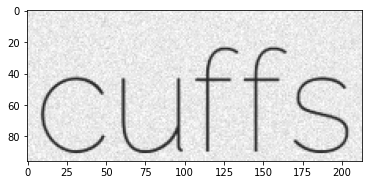

Actual Label: cuffs
Predicted Label: othe


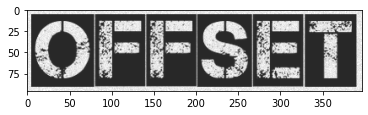

Actual Label: offset
Predicted Label: 


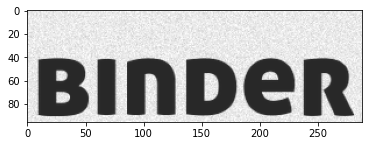

Actual Label: binder
Predicted Label: 


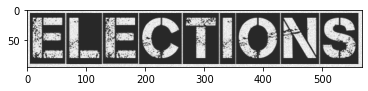

Actual Label: elections
Predicted Label: 


In [ ]:
zero_text_df = text_df[text_df['similarity_score'] == 0]
for index,row in zero_text_df.iterrows():
  if index == 172:
    break
  plt.imshow(cv2.imread(row['image_filename']))
  plt.show()
  print('Actual Label:', row['text_label'])
  print('Predicted Label:', row['predicted_label'])

We can see that no labels were predicted for the last 3 images whereas an incorrect label was predicted for the 1st image. We can infer that pytesseract OCR was not able detect text with a bold font style (as seen in the word 'binder') and when bold fonts are used with a darker background (as seen in the words 'elections' and 'offset) for our dataset.

### Example application: Applying OCR to Business Card Images

We will be utilizing business cards images for the demonstration over here.

Dataset - This dataset includes query and reference images for: (1) CDs, (2) DVDs, (3) books, (4) video clips, (5) landmarks, (6) business cards, (7) text documents, (8) paintings. The format is exactly as described in 2011 ACM Multimedia Systems paper. 

The pytesseract package is used to interface with the Tesseract OCR engine. We then have Python’s regular expression library, re, which will allow us to parse the names, job titles, email addresses, and phone numbers from business cards.

In [ ]:
# import the necessary packages
from imutils.perspective import four_point_transform
import pytesseract
import argparse
import imutils
import cv2
import re
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [ ]:
image = 'business_cards/Canon/019.jpg'

Here, we load our input image from disk and then clone it. We make it a clone to extract the original high-resolution version of the business card.

We then resize our image to have a width of 600px and then compute the ratio of the new width to the old width.

In [ ]:
# load the input image from disk, resize it, and compute the ratio
# of the *new* width to the *old* width
orig = cv2.imread(image)
image = orig.copy()
image = imutils.resize(image, width=600)
ratio = orig.shape[1] / float(image.shape[1])

The image processing steps discussed in earlier sections are applied.

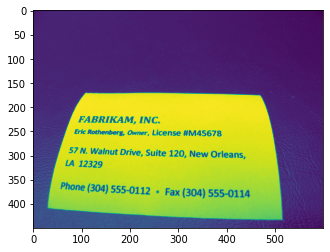

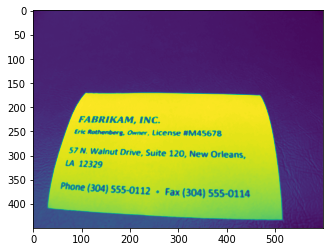

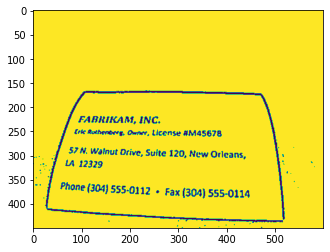

In [ ]:
# convert the image to grayscale, blur it, and apply edge detection
# to reveal the outline of the business card
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

blurred = cv2.medianBlur(gray, 3)
plt.imshow(blurred)
plt.show()

edged = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
plt.imshow(edged)
plt.show()



We convert the business card from BGR to RGB channel ordering and then then perform pytessearct OCR.

Along with this we also use an alternative method which uses binary thresholding and inverse binary thresholding and then performs pytesseract OCR on the image.

We combine both the results captured from the two methods and display the captured text.

In [ ]:
# convert the business card from BGR to RGB channel ordering and then OCR it
rgb = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(rgb)

# alternative method
_, th_1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV) # for black backgrounds - binary - global
_, th_2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) # for white backgrounds - binary - global
text_1 = pytesseract.image_to_string(th_1)
text_2 = pytesseract.image_to_string(th_2)

length_1 = len(text_1)
length_2 = len(text_2)
if length_1 > length_2:
    text_image = text_1
else:
    text_image = text_2

text += text_image

In [ ]:
text = text.strip()
print(text)

FABRIKAM, INC.

  

Erke Rotherterg, Owner, License &M45678

    

W 12329

    

57N, Walnut Drive, Suite 120, New Orleans,

Phone (304) 555-0112 « Fax (304) 555-0114
FABRIKAM, INC.
Erie Rothenberg, Owner, License #MA5678

5? N. Wainut Drive, Suite 120, New Orleans,
tA 12329

Phone (304) 555-0112 « Fax (304} 555-0114


Using regex, we can try to figure out the phone numbers, emails and the names/job titles present on the business card.

In [ ]:
# use regular expressions to parse out phone numbers and email
# addresses from the business card
phoneNums = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)
# attempt to use regular expressions to parse out names/titles (not
# necessarily reliable)
nameExp = r"^[\w'\-,.][^0-9_!¡?÷?¿/\\+=@#$%ˆ&*(){}|~<>;:[\]]{2,}"
names = re.findall(nameExp, text)

In [ ]:
# show the phone numbers header
print("PHONE NUMBERS")
print("=============")
# loop over the detected phone numbers and print them to our terminal
for num in phoneNums:
	print(num.strip())
# show the email addresses header
print("\n")
print("EMAILS")
print("======")
# loop over the detected email addresses and print them to our
# terminal
for email in emails:
	print(email.strip())
# show the name/job title header
print("\n")
print("NAME/JOB TITLE")
print("==============")
# loop over the detected name/job titles and print them to our
# terminal
for name in names:
	print(name.strip())

PHONE NUMBERS
(304) 555-0112
(304) 555-0114
(304) 555-0112


EMAILS


NAME/JOB TITLE
FABRIKAM, INC.

  

Erke Rotherterg, Owner, License


We can see that the name, job title and phone number were detected correctly. There was no email detected which is correct as the given business card did not have any email mentioned.

## Conclusion

In this tutorial, we went through various steps involoved in the process of extracting texts from images using pytesseract OCR. We learnt how to use OpenCV for image processing and how to apply different techniques such as grayscaling, median blurring, adaptive thresholding, binary thresholding etc. so that the process of using pytesseract to capture text becomes easier. Further, we saw how to measure the performance of an OCR system, by using the Jaro-Winkler Similarity Score method. A set of randomly generated images containing texts was obtained and after performing OCR on them using pytessearct, a mean similarity score of 95.56% was obtained. We also analyzed the cases for which OCR did not work efficiently. Finally, we saw an example application of OCR in which we applied OCR to business card images to extract valuable information such as names, job titles, emails and phone numbers.

##References 

[1] R. Smith, "An Overview of the Tesseract OCR Engine," Ninth International Conference on Document Analysis and Recognition (ICDAR 2007), 2007, pp. 629-633, doi: 10.1109/ICDAR.2007.4376991.

[2] Jamshed Memon et al., Optical Character Recognition using Tesseract and Classification, IEEE Access, July 28, 2020. 

[3] Patel, J. A. (n.d.). Handwritten And Printed Text Recognition Using Tesseract-OCR, IJCRT, September 9, 2021.

[4] Nikita Kotwal, Gauri Unnithan, Ashlesh Sheth, Nehal Kadaganchi, Optical Character Recognition using Tesseract Engine, IJCRT, September 9, 2021.

[5] Saurabh Uday Saoji et al., Text Recognition And Detection From Images Using
Pytesseract, Journal of Interdisciplinary Cycle Research, August 2021.

[6]  B. A. Dangiwa and S. S. Kumar, "A Business Card Reader Application for iOS devices based on Tesseract," 2018 International Conference on Signal Processing and Information Security (ICSPIS), 2018, pp. 1-4, doi: 10.1109/CSPIS.2018.8642727.

[7] Chirag Indravadanbhai Patel, Atul Patel, Dharmendra Patel, "Optical Character Recognition by Open source OCR Tool Tesseract: A Case Study", International Journal of Computer Applications, DOI: 10.5120/8794-2784

[8]  https://srinivas-kulkarni.medium.com/jaro-winkler-vs-levenshtein-distance-2eab21832fd6